In [0]:
import itertools
import numpy as np
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')

In [0]:
def plot_data(X, y_label=None, y_pred=None, rows=5, cols=4):
    """Plot the light curve and the associated label. Trims zeroes in X"""
    plot=plt.figure(figsize=(rows * 4, 15))
    for i in range(rows * cols):
        plt.subplot(rows,cols,i+1)
        last_nonzero = np.max(np.nonzero(X[i,:,0]))
        plt.plot(X[i,:last_nonzero,0], '#a0a0a0', label='Light Curve')
        if y_label is not None:
            plt.plot(y_label[i,:last_nonzero], 'r', label='Label')
        if y_pred is not None:
            plt.plot(y_pred[i,:last_nonzero], 'b', label='Prediction')
        if i == 0:
            plt.legend()

    return plot


def plot_history(lc):
    plot=plt.figure()
    plt.plot(lc.history['f1_m'], label = 'Training F1')
    plt.plot(lc.history['val_f1_m'], label = 'Validation F1')
    plt.legend()
    return plot


def plot_curve(y_label, y_pred):
    label_cast_flat = list(itertools.chain(*y_label.astype(int)))
    pred_flat = list(itertools.chain(*y_pred))
    precision, recall, threshold = precision_recall_curve(label_cast_flat, pred_flat)
    f1 = 2 * (precision * recall) / (precision + recall)
    plot = plt.figure()
    plt.plot(threshold, precision[1:], label='Precision')
    plt.plot(threshold, recall[1:], label='Recall')
    plt.plot(threshold, f1[1:], label='F1')
    plt.legend()
    print('Best threshold: ', threshold[np.argmax(f1)-1])
    print('Best F1-Score: ', np.max(f1))
    return plot

In [0]:
from sklearn.metrics import f1_score


def dev_f1score(y_label, y_pred, threshold=0.5):
    label_cast_flat = list(itertools.chain(*y_label.astype(int)))
    pred_flat = [1 if p>threshold else 0 for p in list(itertools.chain(*y_pred))]
    return f1_score(label_cast_flat, pred_flat)

# Examples

In [0]:
import pickle


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Example - ploting X_train

X_train = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train.p', 'rb'))
y_train = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_train.p', 'rb'))

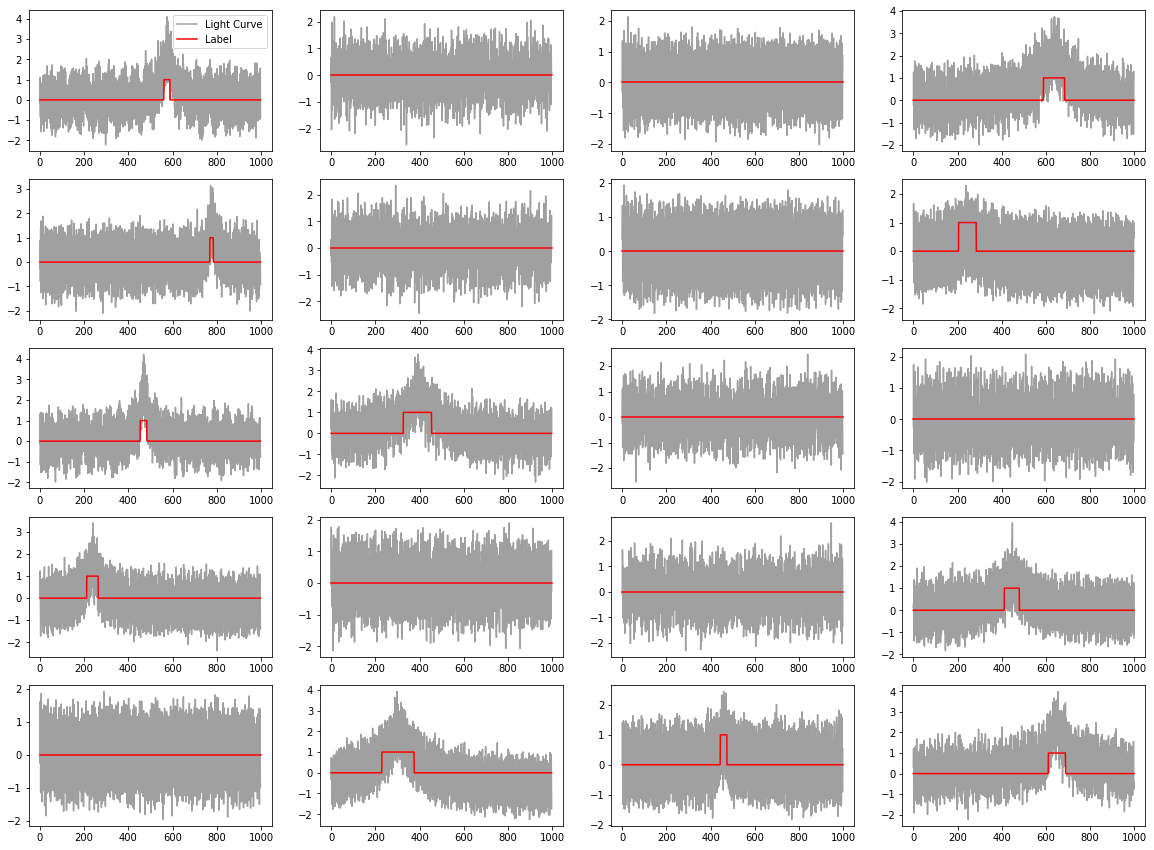

In [0]:
plot=plot_data(X_train, y_label=y_train)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/X_train.svg') # Save in SVG for high-quality vectorized image
plot.show() # Inline in PNG for easy copy-and-paste